In [40]:
import os
import pickle
import pickle5
import itertools
import pandas as pd

from dotenv import load_dotenv
from copy import deepcopy

from ase.io.vasp import read_vasp, write_vasp
from ase.visualize import view

from pymatgen import MPRester
from pymatgen import Composition, Element
from pymatgen.entries.computed_entries import ComputedEntry
from pymatgen.analysis.phase_diagram import CompoundPhaseDiagram, PhaseDiagram, GrandPotentialPhaseDiagram, PDPlotter
from pymatgen.entries.compatibility import MaterialsProjectAqueousCompatibility
from pymatgen.analysis.pourbaix_diagram import PourbaixEntry, IonEntry
from pymatgen.analysis.pourbaix_diagram import PourbaixDiagram, PourbaixPlotter
from pymatgen.core.ion import Ion


import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [41]:
load_dotenv('.env')
MATERIAL_API_KEY = os.getenv('MATERIAL_API_KEY')

mpr = MPRester(MATERIAL_API_KEY)

In [42]:
with open('../results_nurion/bulk_analysis/df_bulk_v2.pkl', 'rb') as f:
    data = pickle5.load(f)
# print(data)
df_bulk = pd.DataFrame(data)
df_bulk

MP_ID formula      PREC  ALGO ISPIN IMIX NELM IBRION    EDIFF  NSW  \
1      mp-12631  SrTcO3  Accurate  Fast     2    4  100      2    2e-06  200   
2      mp-19035  BaFeO3  Accurate  Fast     2    4  100      2   0.0001  200   
3      mp-19322  BaMoO3  Accurate  Fast     2    4  100      2   0.0001  200   
4       mp-3614   KTaO3  Accurate  Fast     2    4  100      2    2e-06  200   
5       mp-3834  BaZrO3  Accurate  Fast     2    4  100      2    1e-07   99   
..          ...     ...       ...   ...   ...  ...  ...    ...      ...  ...   
343   mp-976848  NiRuO3  Accurate  Fast     2    4  100      2  0.00025   99   
344   mp-972296  ZrOsO3  Accurate  Fast     2    4  100      2  0.00025   99   
345  mp-1183277   BPtO3  Accurate  Fast     2    4  100      2  0.00025   99   
346  mp-1183221   BIrO3  Accurate  Fast     2    4  100      2  0.00025   99   
347  mp-1183397   CoBO3  Accurate  Fast     2    4  100      2  0.00025   99   

     ... Volume_ref   Volume Err_V_percent Theoretical     VBM  E_fermi  \
1    ...    63.1491  62.1201       1.62938       False    None  7.15536   
2    ...    65.5993  65.5993             0       False    None  3.27322   
3    ...    71.4286   70.764      0.930459       False    None  5.68616   
4    ...    65.4917  65.3762      0.176445       False  1.5991  1.84427   
5    ...    77.0743  76.0138       1.37593       False  3.5638  3.90525   
..   ...        ...      ...           ...         ...     ...      ...   
343  ...    51.3811  52.3173      -1.82207        True    None  5.76039   
344  ...    60.5275   60.408      0.197536        True    None  8.64263   
345  ...    40.9646  40.9646             0        True    None  8.12442   
346  ...    39.8497  39.8497             0        True    None  7.89611   
347  ...    37.7553  37.7553             0        True    None  6.98182   

        CBM    bgtype   bgpath  \
1      None  Indirect     None   
2      None  Indirect     None   
3      None  Indirect     None   
4    3.7071  Indirect  R-gamma   
5     6.683  Indirect  R-gamma   
..      ...       ...      ...   
343    None  Indirect     None   
344    None  Indirect     None   
345    None  Indirect     None   
346    None  Indirect     None   
347    None  Indirect     None   

                                             structure  
1    (Atom('Sr', [0.0, 0.0, 0.0], index=0), Atom('T...  
2    (Atom('Ba', [2.0165225, 2.0165225, 2.0165225],...  
3    (Atom('Ba', [2.068112131752645, 2.068112131752...  
4    (Atom('K', [2.0142334299130127, 2.014233429913...  
5    (Atom('Ba', [0.0, 0.0, 0.0], index=0), Atom('Z...  
..                                                 ...  
343  (Atom('Ni', [0.0, 0.0, 0.0], index=0), Atom('R...  
344  (Atom('Zr', [0.0, 0.0, 0.0], index=0), Atom('O...  
345  (Atom('B', [1.723612, 1.723612, 1.723612], ind...  
346  (Atom('B', [1.707831, 1.707831, 1.707831], ind...  
347  (Atom('Co', [0.0, 0.0, 0.0], index=0), Atom('B...  

[347 rows x 44 columns]

In [43]:
with open('df_entries.pkl', 'rb') as f:
    data = pickle.load(f)
df_entries = pd.DataFrame(data)
df_entries

formula       mp_id A_site B_site  A_charge_final A_radi_final  \
0    SrTcO3    mp-12631     Sr     Tc             2.0         1.44   
1    BaFeO3    mp-19035     Ba     Fe             2.0         1.61   
2    BaMoO3    mp-19322     Ba     Mo             2.0         1.61   
3     KTaO3     mp-3614      K     Ta             1.0         1.64   
4    BaZrO3     mp-3834     Ba     Zr             2.0         1.61   
..      ...         ...    ...    ...             ...          ...   
342  NiRuO3   mp-976848     Ru     Ni             4.0         0.94   
343  ZrOsO3   mp-972296     Zr     Os             2.0         1.31   
344   BPtO3  mp-1183277     Pt      B             2.0         0.95   
345   BIrO3  mp-1183221     Ir      B             3.0         0.84   
346   CoBO3  mp-1183397     Co      B             3.0         0.98   

     B_charge_final B_radi_final   Case  old_tolerance  new_tolerance  \
0               4.0         0.65    6_1       0.979602       3.724156   
1               4.0         0.59    6_1       1.069543       3.809486   
2               4.0         0.65    6_1       1.038240       3.615536   
3               5.0         0.64    6_1       1.053728       3.910715   
4               4.0         0.72    6_1       1.003958       3.501807   
..              ...          ...    ...            ...            ...   
342             2.0         0.69  6_3_1       0.791689       3.653442   
343             4.0         0.63    6_1       0.943970       3.903062   
344             3.0         0.27    5_1       0.995031       6.778836   
345             3.0         0.27    6_1       0.948455       4.408532   
346             3.0         0.27    6_1       1.007733       4.631877   

        rB/r0  
0    0.464286  
1    0.421429  
2    0.464286  
3    0.457143  
4    0.514286  
..        ...  
342  0.492857  
343  0.450000  
344  0.192857  
345  0.192857  
346  0.192857  

[347 rows x 12 columns]

In [44]:
df_entries.index = range(1, len(df_entries) + 1)
df_entries

formula       mp_id A_site B_site  A_charge_final A_radi_final  \
1    SrTcO3    mp-12631     Sr     Tc             2.0         1.44   
2    BaFeO3    mp-19035     Ba     Fe             2.0         1.61   
3    BaMoO3    mp-19322     Ba     Mo             2.0         1.61   
4     KTaO3     mp-3614      K     Ta             1.0         1.64   
5    BaZrO3     mp-3834     Ba     Zr             2.0         1.61   
..      ...         ...    ...    ...             ...          ...   
343  NiRuO3   mp-976848     Ru     Ni             4.0         0.94   
344  ZrOsO3   mp-972296     Zr     Os             2.0         1.31   
345   BPtO3  mp-1183277     Pt      B             2.0         0.95   
346   BIrO3  mp-1183221     Ir      B             3.0         0.84   
347   CoBO3  mp-1183397     Co      B             3.0         0.98   

     B_charge_final B_radi_final   Case  old_tolerance  new_tolerance  \
1               4.0         0.65    6_1       0.979602       3.724156   
2               4.0         0.59    6_1       1.069543       3.809486   
3               4.0         0.65    6_1       1.038240       3.615536   
4               5.0         0.64    6_1       1.053728       3.910715   
5               4.0         0.72    6_1       1.003958       3.501807   
..              ...          ...    ...            ...            ...   
343             2.0         0.69  6_3_1       0.791689       3.653442   
344             4.0         0.63    6_1       0.943970       3.903062   
345             3.0         0.27    5_1       0.995031       6.778836   
346             3.0         0.27    6_1       0.948455       4.408532   
347             3.0         0.27    6_1       1.007733       4.631877   

        rB/r0  
1    0.464286  
2    0.421429  
3    0.464286  
4    0.457143  
5    0.514286  
..        ...  
343  0.492857  
344  0.450000  
345  0.192857  
346  0.192857  
347  0.192857  

[347 rows x 12 columns]

In [45]:
properties1 = ['MP_ID','formula','total_E','structure','Ehull_ref','DHf','DHf_ref']
properties2 = ['A_site','B_site','old_tolerance','new_tolerance']

df_analysis = pd.merge(df_bulk[properties1], df_entries[properties2], left_index = True, right_index = True)
df_analysis

MP_ID formula  total_E  \
1      mp-12631  SrTcO3 -37.3222   
2      mp-19035  BaFeO3 -31.4303   
3      mp-19322  BaMoO3 -35.0364   
4       mp-3614   KTaO3 -41.0688   
5       mp-3834  BaZrO3 -41.7257   
..          ...     ...      ...   
343   mp-976848  NiRuO3 -25.5823   
344   mp-972296  ZrOsO3  -38.698   
345  mp-1183277   BPtO3 -27.1933   
346  mp-1183221   BIrO3 -29.7549   
347  mp-1183397   CoBO3 -29.3377   

                                             structure Ehull_ref        DHf  \
1    (Atom('Sr', [0.0, 0.0, 0.0], index=0), Atom('T...         0   -2.53011   
2    (Atom('Ba', [2.0165225, 2.0165225, 2.0165225],...         0   -2.26297   
3    (Atom('Ba', [2.068112131752645, 2.068112131752...         0   -2.61079   
4    (Atom('K', [2.0142334299130127, 2.014233429913...         0   -3.10677   
5    (Atom('Ba', [0.0, 0.0, 0.0], index=0), Atom('Z...         0   -3.72278   
..                                                 ...       ...        ...   
343  (Atom('Ni', [0.0, 0.0, 0.0], index=0), Atom('R...   1.45574 -0.0691529   
344  (Atom('Zr', [0.0, 0.0, 0.0], index=0), Atom('O...   1.45962   -1.25399   
345  (Atom('B', [1.723612, 1.723612, 1.723612], ind...   1.50704  -0.346541   
346  (Atom('B', [1.707831, 1.707831, 1.707831], ind...   1.67468  -0.308362   
347  (Atom('Co', [0.0, 0.0, 0.0], index=0), Atom('B...   1.76304  -0.966379   

      DHf_ref A_site B_site  old_tolerance  new_tolerance  
1     -2.4626     Sr     Tc       0.979602       3.724156  
2    -2.24803     Ba     Fe       1.069543       3.809486  
3    -2.59231     Ba     Mo       1.038240       3.615536  
4    -3.08679      K     Ta       1.053728       3.910715  
5    -3.64821     Ba     Zr       1.003958       3.501807  
..        ...    ...    ...            ...            ...  
343  0.160063     Ru     Ni       0.791689       3.653442  
344  -1.24075     Zr     Os       0.943970       3.903062  
345 -0.329574     Pt      B       0.995031       6.778836  
346 -0.300929     Ir      B       0.948455       4.408532  
347 -0.945021     Co      B       1.007733       4.631877  

[347 rows x 11 columns]

In [46]:
columns = ['MP_ID','formula','A_site','B_site','total_E','Ehull_ref','DHf','DHf_ref','old_tolerance','new_tolerance','structure']
df_analysis = df_analysis[columns]
df_analysis

MP_ID formula A_site B_site  total_E Ehull_ref        DHf   DHf_ref  \
1      mp-12631  SrTcO3     Sr     Tc -37.3222         0   -2.53011   -2.4626   
2      mp-19035  BaFeO3     Ba     Fe -31.4303         0   -2.26297  -2.24803   
3      mp-19322  BaMoO3     Ba     Mo -35.0364         0   -2.61079  -2.59231   
4       mp-3614   KTaO3      K     Ta -41.0688         0   -3.10677  -3.08679   
5       mp-3834  BaZrO3     Ba     Zr -41.7257         0   -3.72278  -3.64821   
..          ...     ...    ...    ...      ...       ...        ...       ...   
343   mp-976848  NiRuO3     Ru     Ni -25.5823   1.45574 -0.0691529  0.160063   
344   mp-972296  ZrOsO3     Zr     Os  -38.698   1.45962   -1.25399  -1.24075   
345  mp-1183277   BPtO3     Pt      B -27.1933   1.50704  -0.346541 -0.329574   
346  mp-1183221   BIrO3     Ir      B -29.7549   1.67468  -0.308362 -0.300929   
347  mp-1183397   CoBO3     Co      B -29.3377   1.76304  -0.966379 -0.945021   

     old_tolerance  new_tolerance  \
1         0.979602       3.724156   
2         1.069543       3.809486   
3         1.038240       3.615536   
4         1.053728       3.910715   
5         1.003958       3.501807   
..             ...            ...   
343       0.791689       3.653442   
344       0.943970       3.903062   
345       0.995031       6.778836   
346       0.948455       4.408532   
347       1.007733       4.631877   

                                             structure  
1    (Atom('Sr', [0.0, 0.0, 0.0], index=0), Atom('T...  
2    (Atom('Ba', [2.0165225, 2.0165225, 2.0165225],...  
3    (Atom('Ba', [2.068112131752645, 2.068112131752...  
4    (Atom('K', [2.0142334299130127, 2.014233429913...  
5    (Atom('Ba', [0.0, 0.0, 0.0], index=0), Atom('Z...  
..                                                 ...  
343  (Atom('Ni', [0.0, 0.0, 0.0], index=0), Atom('R...  
344  (Atom('Zr', [0.0, 0.0, 0.0], index=0), Atom('O...  
345  (Atom('B', [1.723612, 1.723612, 1.723612], ind...  
346  (Atom('B', [1.707831, 1.707831, 1.707831], ind...  
347  (Atom('Co', [0.0, 0.0, 0.0], index=0), Atom('B...  

[347 rows x 11 columns]

In [47]:
U_corr_dict = {'V':-1.682, 'Cr':-2.013, 'Mn':-1.68085, 'Fe':-2.733,
               'Co':-1.874, 'Ni':-2.164, 'Mo':-3.531, 'W':-5.159, 'O' : -0.7023}

In [48]:
def computed_entry(index):
    
    atoms = df_analysis.structure[index]
    comp = Composition(str(atoms.symbols))
    energy = df_analysis.total_E[index]
    
    comp_dict = {}
    for i in comp:
        comp_dict[str(i)] = int(comp[i])
    
    # Calculate corrections
    element_list = [i for i in comp_dict.keys()]
    correction = 0
    for i in element_list:
        if i in list(U_corr_dict):
            correction += U_corr_dict[i] * comp_dict[i]
    
    # Add parameters
    parameters = {}
    parameters['oxide_type'] = 'oxide'
    
    data = {}
    data['oxide_type'] = 'oxide'
    
    return ComputedEntry(composition = comp, energy = energy, correction = correction, parameters = parameters,
                        data = data, entry_id = 'gyjung')

In [49]:
computed_entry(248)

ComputedEntry gyjung - Na1 Nb1 O3
Energy = -38.2285
Correction = -2.1069
Parameters:
oxide_type = oxide
Data:
oxide_type = oxide

In [50]:
#df_analysis['Ehull_ori'] = None
df_analysis['Ehull'] = None
for index in range(1,len(df_analysis)+1):
    entries = mpr.get_entries_in_chemsys([df_analysis.A_site[index], df_analysis.B_site[index],'O'])
    new_entries = entries + [computed_entry(index)]
    phase_diagram = PhaseDiagram(new_entries)
    
#    for entry in new_entries:
#        if entry.entry_id == df_analysis.MP_ID[index]:
#            entry_ori = entry
    
 #   Ehull_ori = new_phase_diagram.get_e_above_hull(entry_ori)
 #   df_analysis['Ehull_ori'][index] = Ehull_ori
    Ehull = phase_diagram.get_e_above_hull(computed_entry(index))
    df_analysis['Ehull'][index] = Ehull
    print(index," ",df_analysis.formula[index]," %4.3f" % Ehull)

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

1   SrTcO3  -0.000
2   BaFeO3  0.040
3   BaMoO3  -0.000
4   KTaO3  0.014
5   BaZrO3  0.000
6   SrFeO3  0.048
7   KTcO3  -0.000
8   NaTcO3  -0.000
9   BaHfO3  0.007
10   SrTiO3  0.027
11   SrCuO3  0.078
12   KNbO3  0.023
13   NaTaO3  0.017
14   BaScO3  0.047
15   BaPdO3  0.017
16   BaTaO3  0.046
17   SrHfO3  0.045
18   NaOsO3  0.030
19   TlTcO3  0.011
20   KReO3  0.055
21   SrRuO3  0.004
22   KHfO3  0.051
23   SrVO3  0.076
24   KOsO3  0.044
25   TaAgO3  0.071
26   SrNiO3  0.136
27   RbIrO3  0.060
28   NaReO3  0.048
29   SrMnO3  0.104
30   CaFeO3  0.101
31   SrZrO3  0.000
32   NaWO3  0.068
33   RbTaO3  0.067
34   SrCoO3  0.081
35   SrTaO3  0.079
36   KZrO3  0.013
37   CaTiO3  0.095
38   NaRuO3  0.012
39   LiTcO3  0.000
40   SrPdO3  0.057
41   KWO3  0.092
42   KRhO3  0.057
43   BaCuO3  0.150
44   RbNbO3  0.089
45   BaOsO3  0.083
46   BaRuO3  0.057
47   KRuO3  0.054
48   SrMoO3  0.065
49   NaTiO3  0.105
50   SrScO3  0.119
51   RbOsO3  0.090
52   SrRhO3  0.089
53   NaMoO3  0.040
54   SrOsO3

In [52]:
columns = ['MP_ID','formula','A_site','B_site','total_E','Ehull','Ehull_ref','DHf','DHf_ref','old_tolerance','new_tolerance','structure']
df_analysis = df_analysis[columns]
df_analysis

MP_ID formula A_site B_site  total_E        Ehull Ehull_ref  \
1      mp-12631  SrTcO3     Sr     Tc -37.3222 -8.88178e-16         0   
2      mp-19035  BaFeO3     Ba     Fe -31.4303    0.0404226         0   
3      mp-19322  BaMoO3     Ba     Mo -35.0364 -1.77636e-15         0   
4       mp-3614   KTaO3      K     Ta -41.0688    0.0140585         0   
5       mp-3834  BaZrO3     Ba     Zr -41.7257            0         0   
..          ...     ...    ...    ...      ...          ...       ...   
343   mp-976848  NiRuO3     Ru     Ni -25.5823      1.30465   1.45574   
344   mp-972296  ZrOsO3     Zr     Os  -38.698      1.46316   1.45962   
345  mp-1183277   BPtO3     Pt      B -27.1933       1.4954   1.50704   
346  mp-1183221   BIrO3     Ir      B -29.7549      1.67559   1.67468   
347  mp-1183397   CoBO3     Co      B -29.3377      1.25949   1.76304   

           DHf   DHf_ref  old_tolerance  new_tolerance  \
1     -2.53011   -2.4626       0.979602       3.724156   
2     -2.26297  -2.24803       1.069543       3.809486   
3     -2.61079  -2.59231       1.038240       3.615536   
4     -3.10677  -3.08679       1.053728       3.910715   
5     -3.72278  -3.64821       1.003958       3.501807   
..         ...       ...            ...            ...   
343 -0.0691529  0.160063       0.791689       3.653442   
344   -1.25399  -1.24075       0.943970       3.903062   
345  -0.346541 -0.329574       0.995031       6.778836   
346  -0.308362 -0.300929       0.948455       4.408532   
347  -0.966379 -0.945021       1.007733       4.631877   

                                             structure  
1    (Atom('Sr', [0.0, 0.0, 0.0], index=0), Atom('T...  
2    (Atom('Ba', [2.0165225, 2.0165225, 2.0165225],...  
3    (Atom('Ba', [2.068112131752645, 2.068112131752...  
4    (Atom('K', [2.0142334299130127, 2.014233429913...  
5    (Atom('Ba', [0.0, 0.0, 0.0], index=0), Atom('Z...  
..                                                 ...  
343  (Atom('Ni', [0.0, 0.0, 0.0], index=0), Atom('R...  
344  (Atom('Zr', [0.0, 0.0, 0.0], index=0), Atom('O...  
345  (Atom('B', [1.723612, 1.723612, 1.723612], ind...  
346  (Atom('B', [1.707831, 1.707831, 1.707831], ind...  
347  (Atom('Co', [0.0, 0.0, 0.0], index=0), Atom('B...  

[347 rows x 12 columns]

In [53]:
fig = make_subplots(rows=1, cols =1, shared_xaxes = True)

fig.add_trace(go.Scatter(x = df_analysis['formula'], y = df_analysis['Ehull_ref'], name = r'$ E_{\text{hull}} \text{(ref)}$', mode = 'markers',
                        text = df_analysis.index))
fig.add_trace(go.Scatter(x = df_analysis['formula'], y = df_analysis['Ehull'], name = r'$ E_{\text{hull}} \text{(calc.)}$', mode = 'markers',
                        text = df_analysis.index))
fig.add_trace(go.Scatter(x = df_analysis['formula'], y = df_analysis['DHf'], name = r'$\Delta H_{\text{f}} \text{(calc.)}$', mode = 'markers' ,
                        text = df_analysis.index))
fig.add_trace(go.Scatter(x = df_analysis['formula'], y = df_analysis['DHf_ref'], name = r'$\Delta H_{\text{f}} \text{(ref.)}$', mode = 'markers',
                        text = df_analysis.index))

fig.update_xaxes(title_text = 'formula',  titlefont = dict(size = 20),
          #       tickfont = dict(size=18),
                   zeroline = False,
                   gridwidth = 1)

fig.update_yaxes(title_text = 'Energy (eV/atom)',  titlefont = dict(size = 20),
                 # tickfont = dict(size=10),
                   zeroline = False,
                   gridwidth = 1)

fig.update_layout(title = r'$ E_{\text{hull}} vs \Delta H_{\text{f}}$',plot_bgcolor = 'white')

# pyo.iplot(fig)
fig.show()
# py.iplot(fig, filename = 'ehull_DHf')
# fig.write_html('Ehull_DHf.html')

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\util\plotting.py:54: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



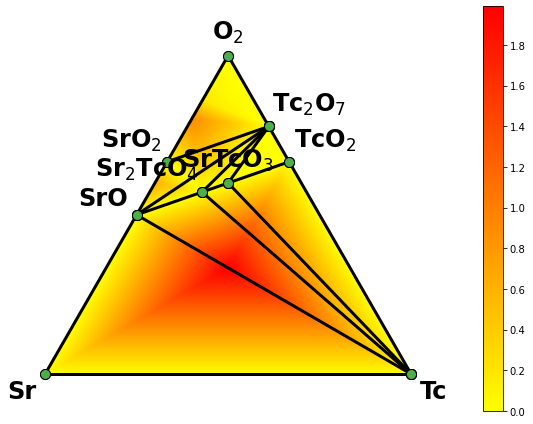

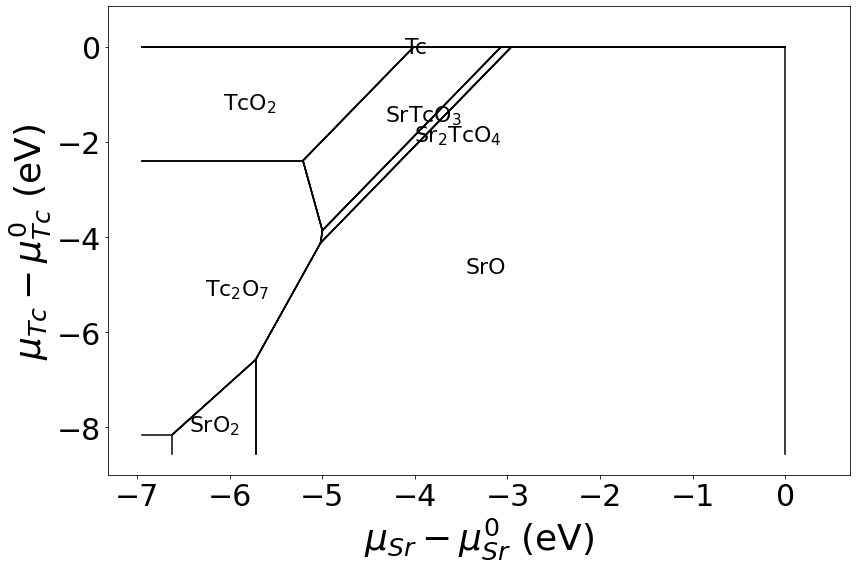

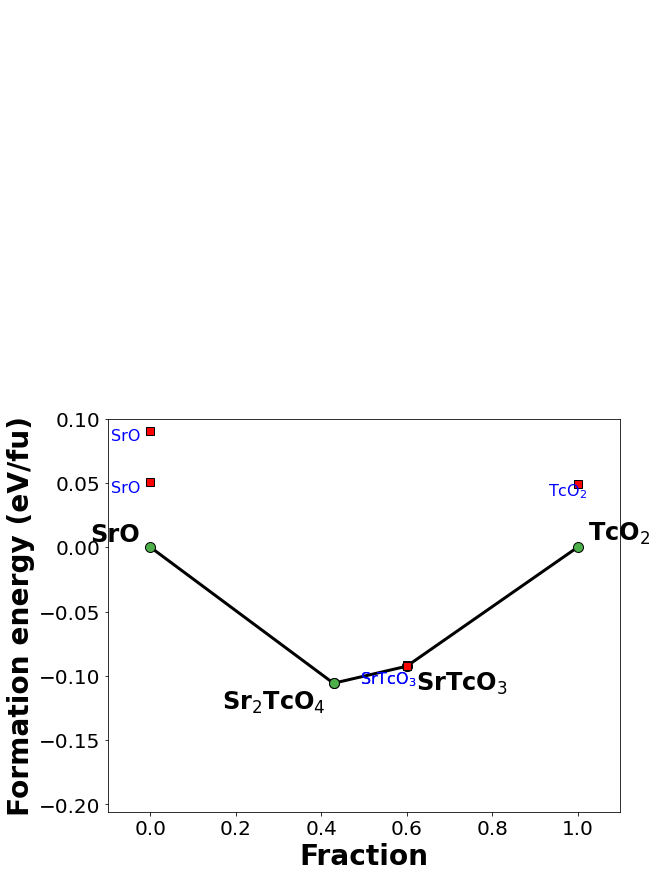

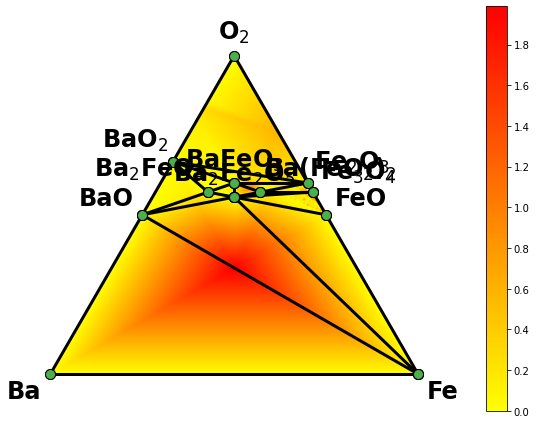

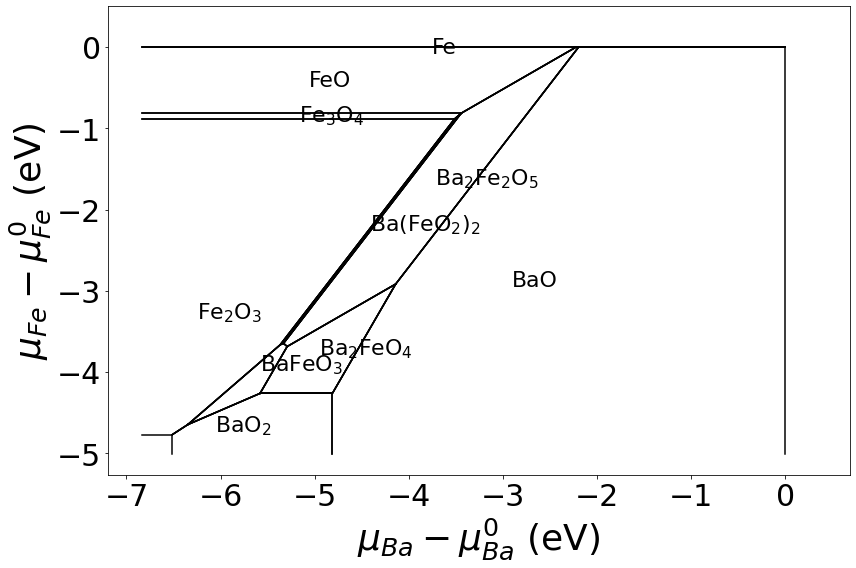

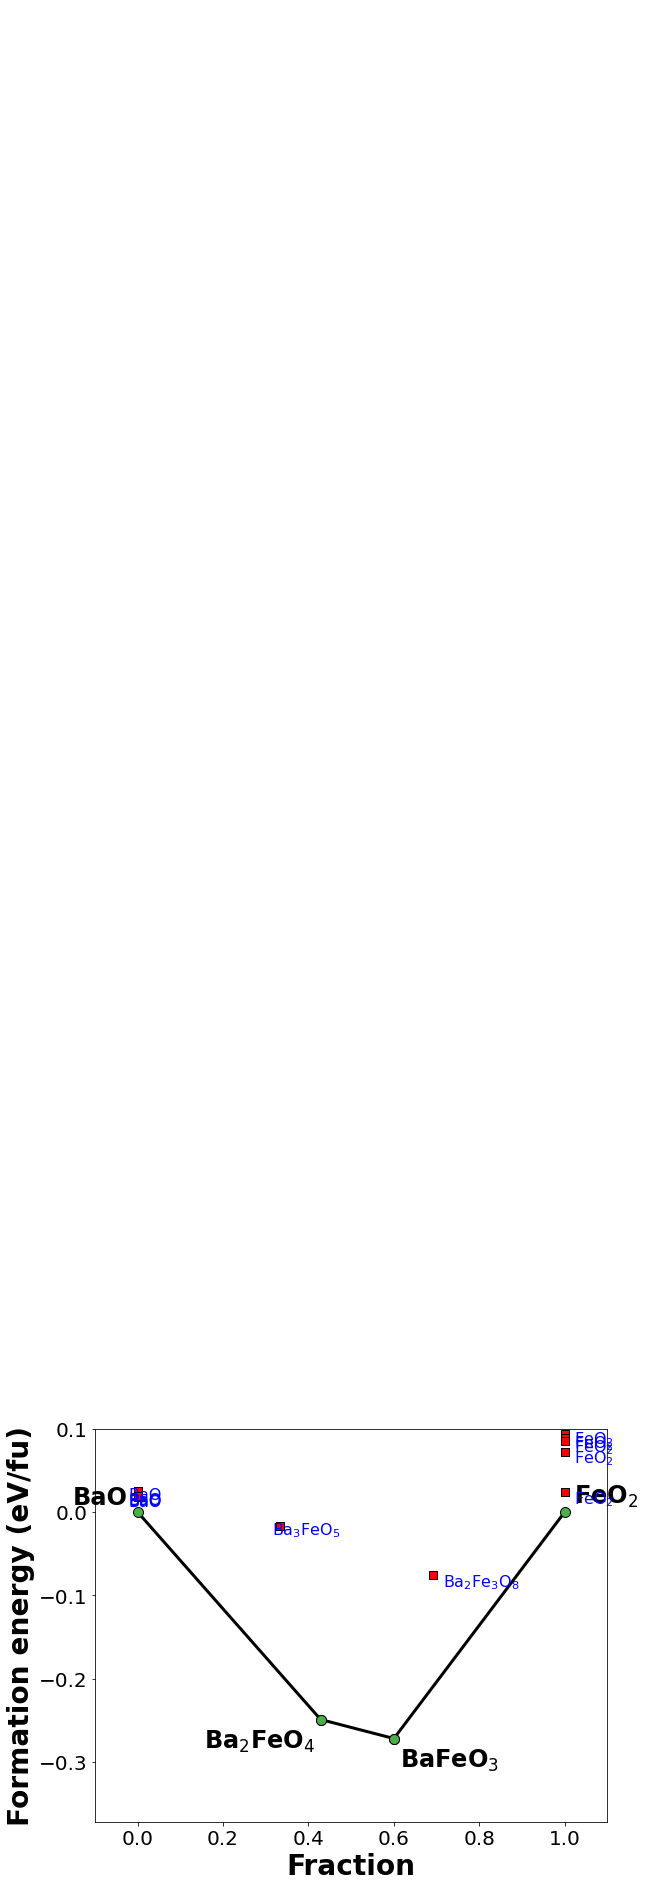

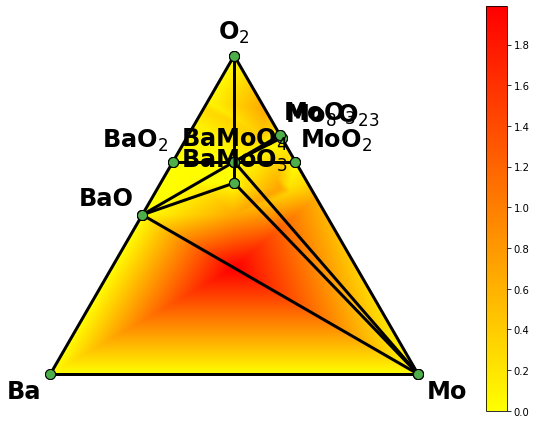

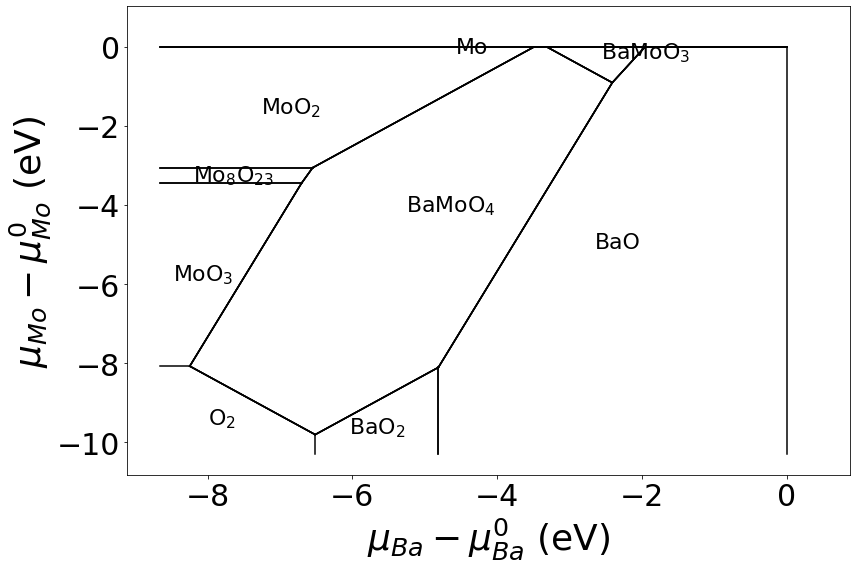

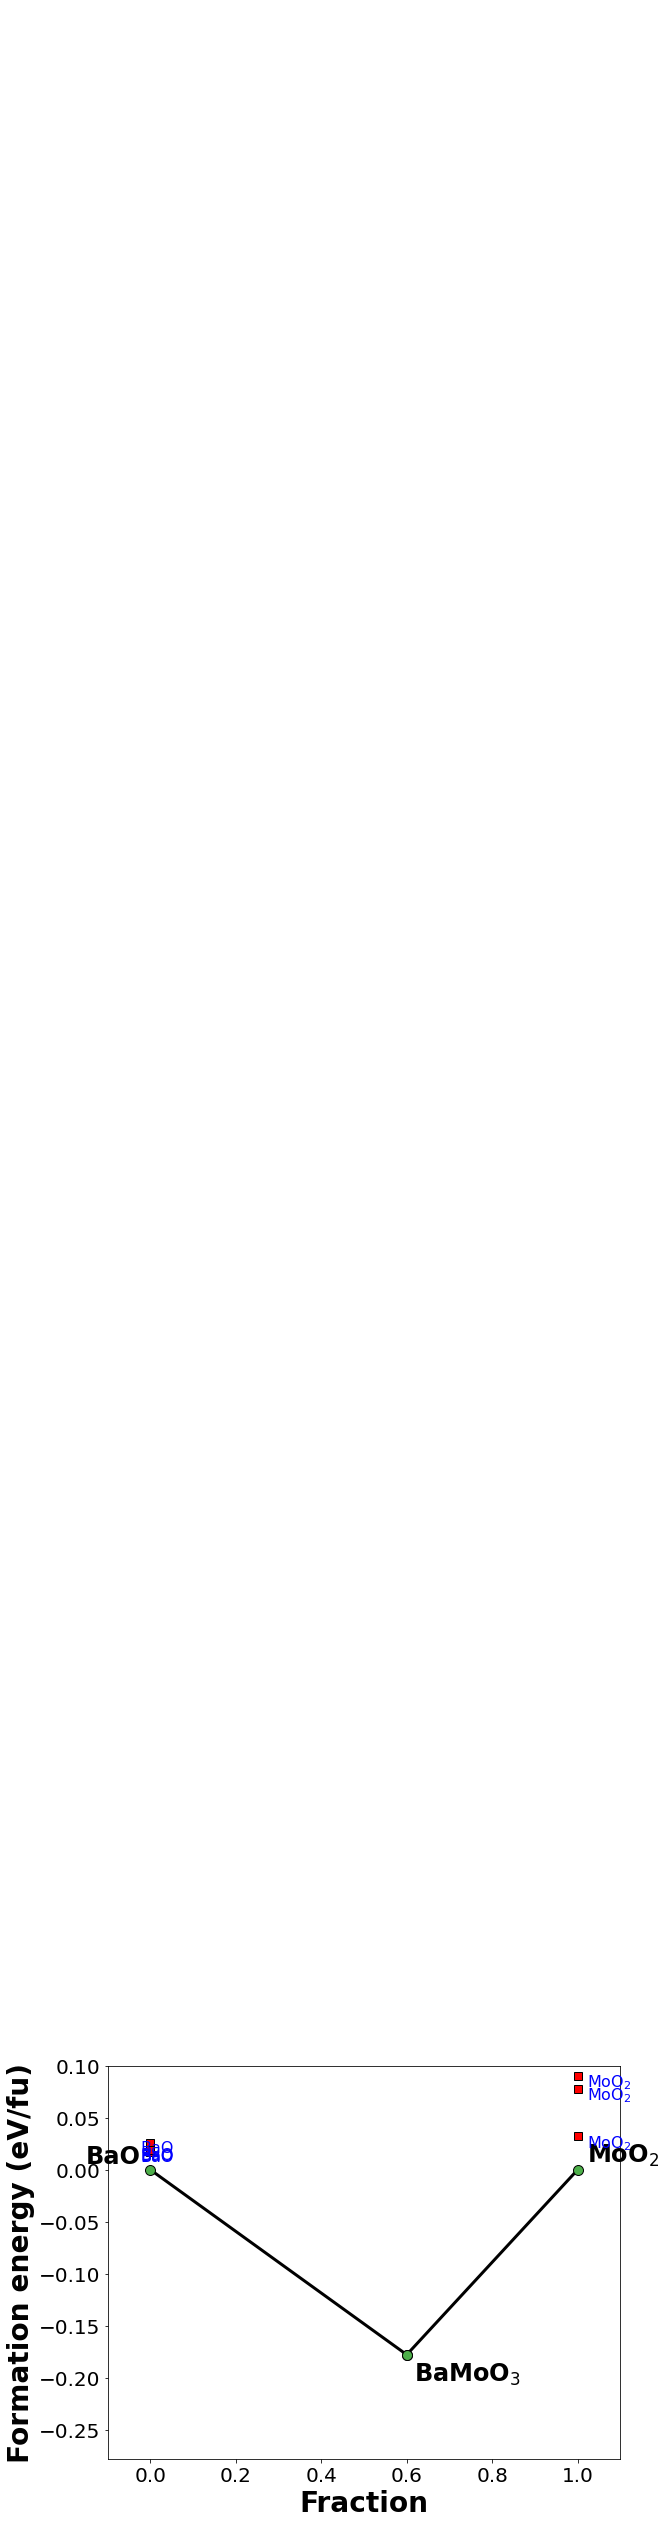

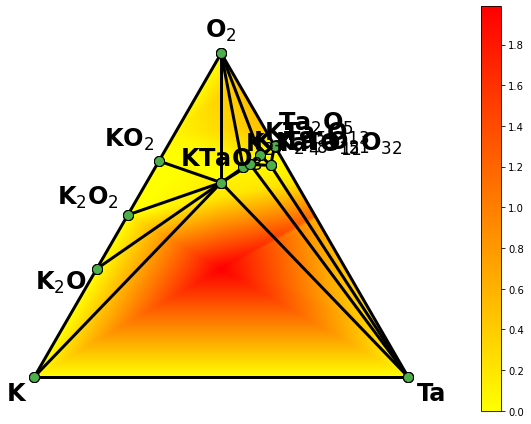

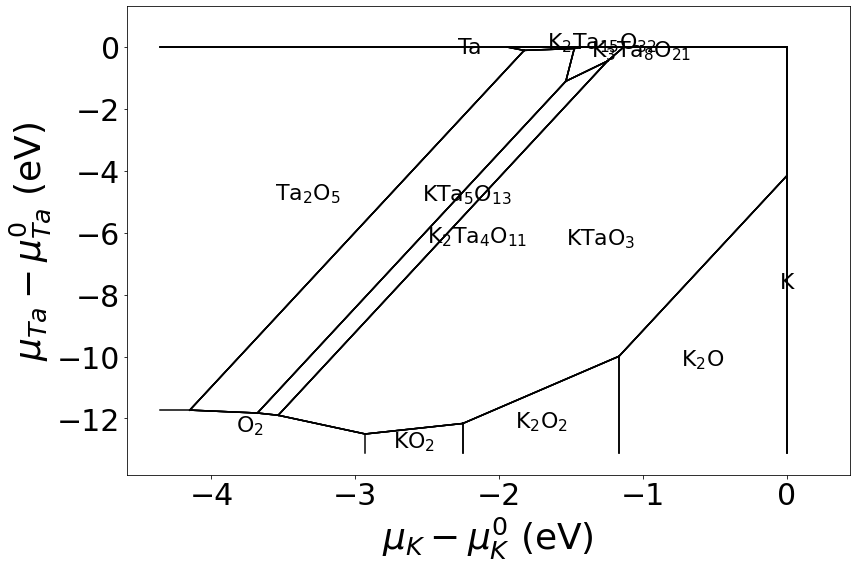

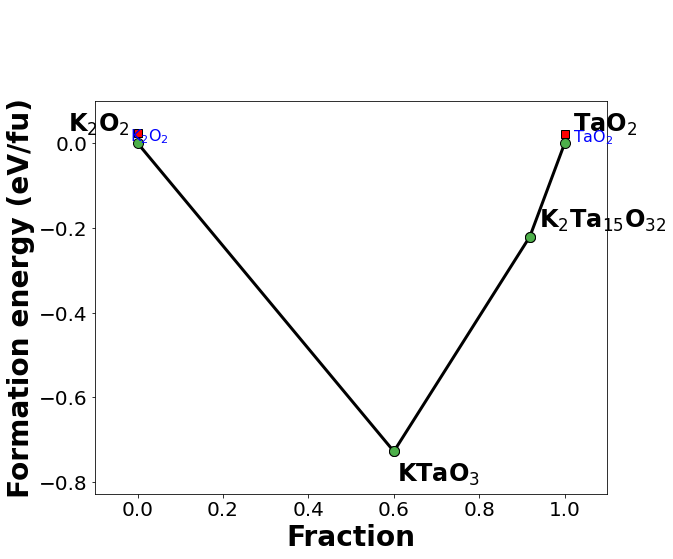

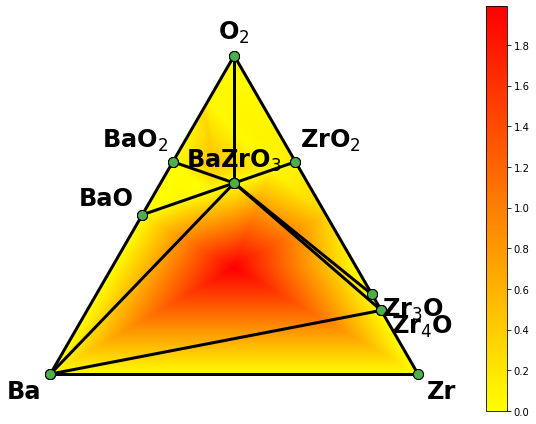

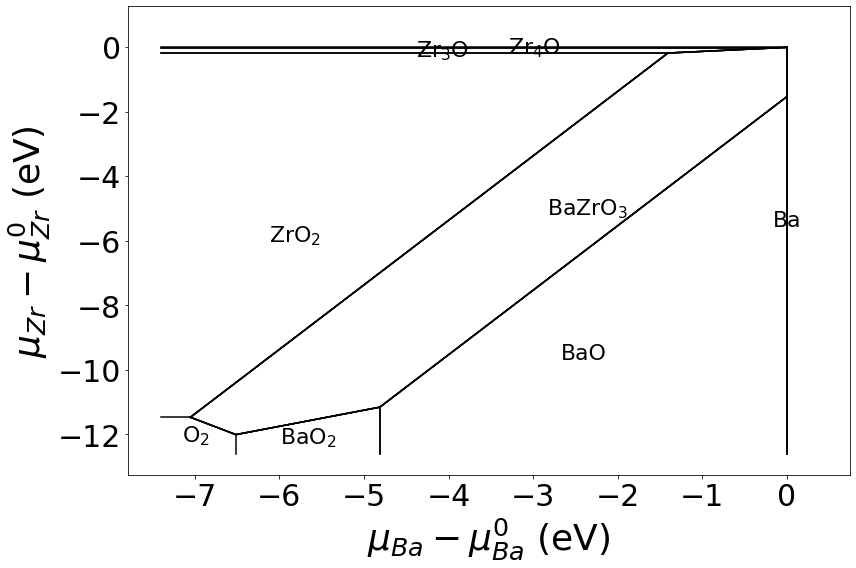

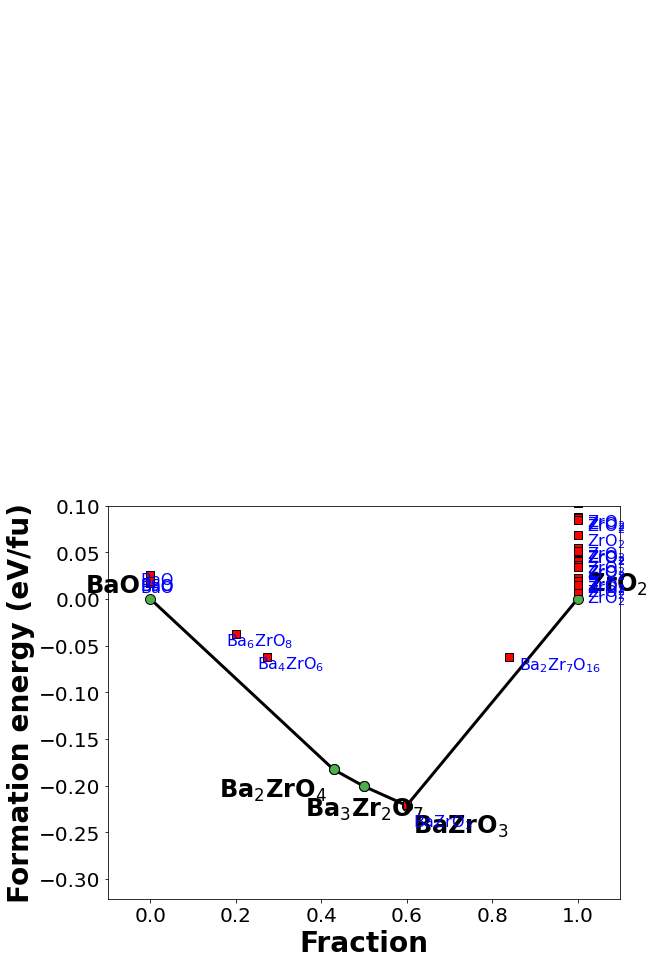

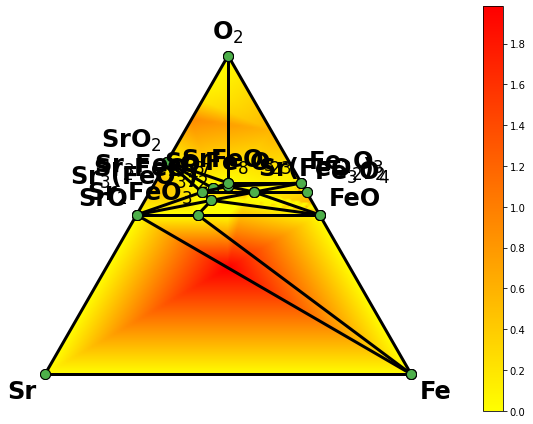

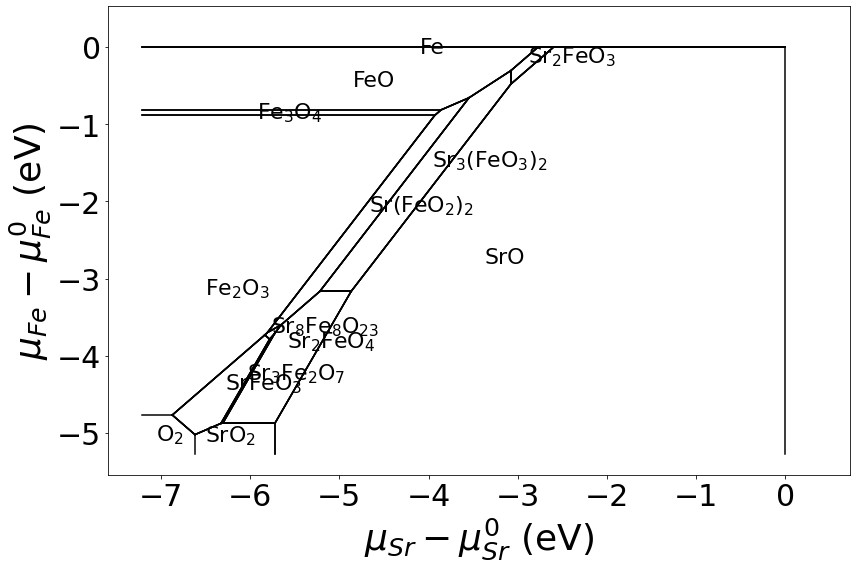

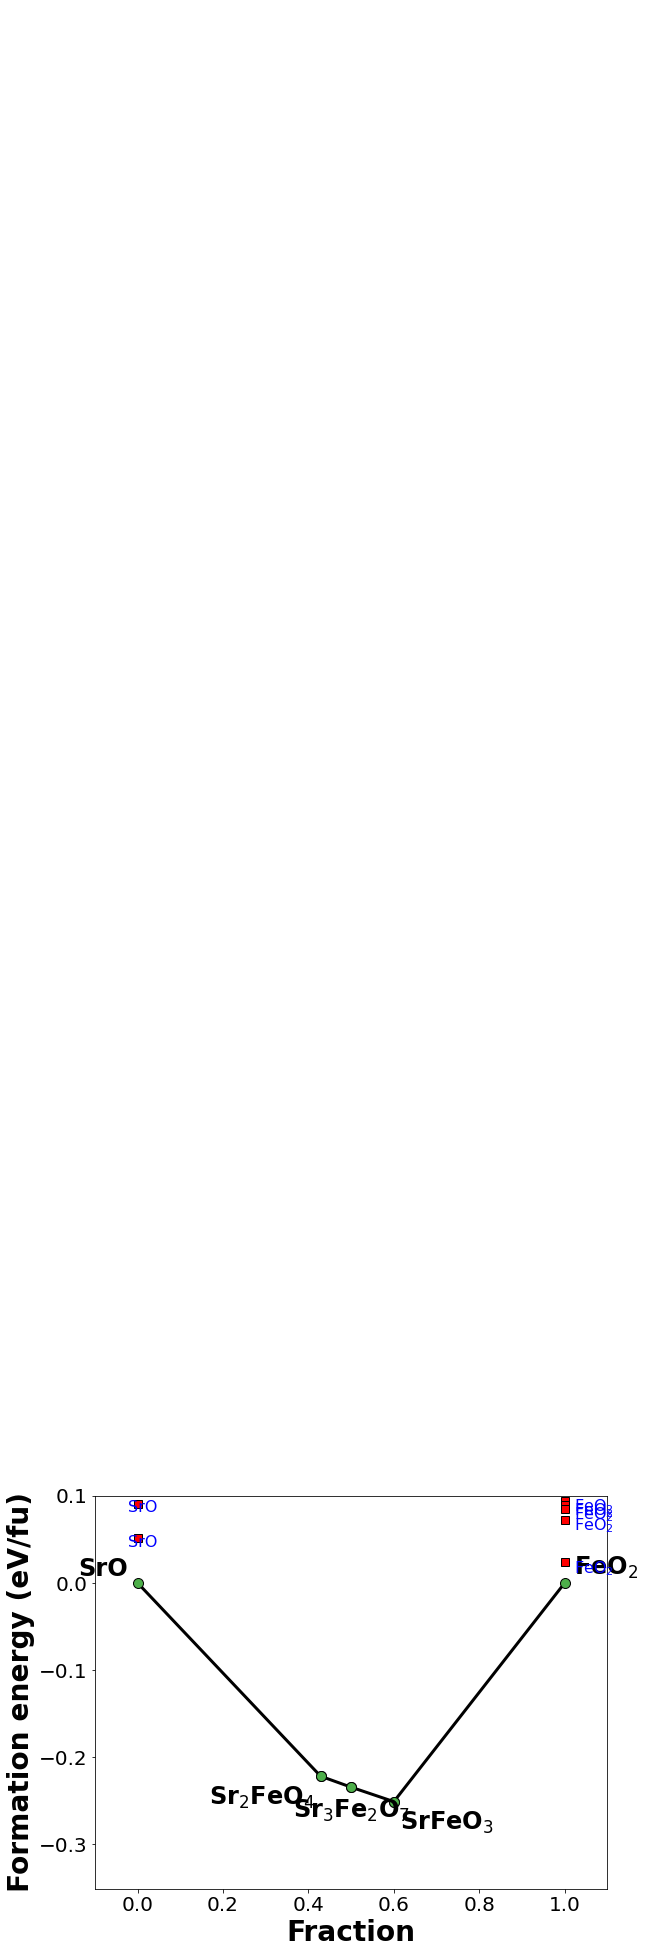

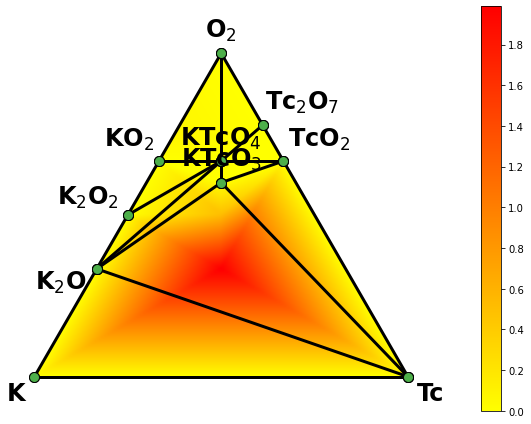

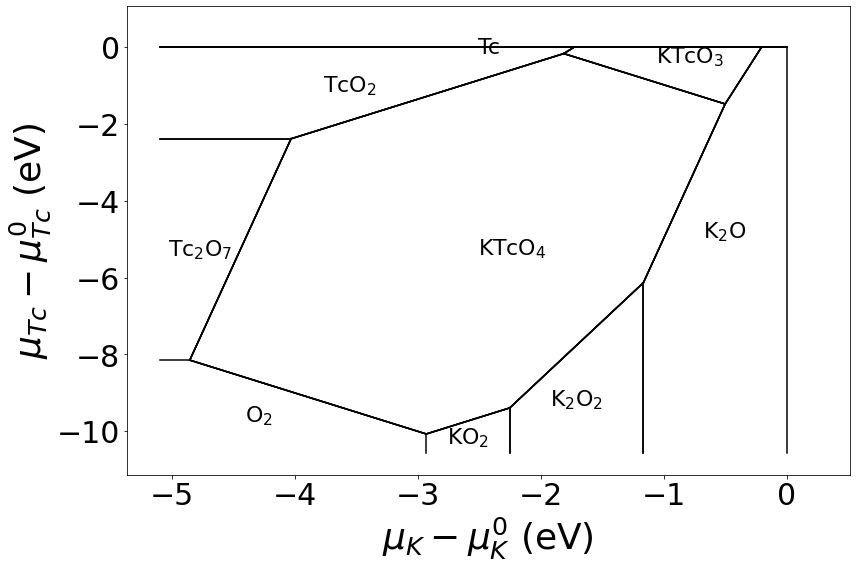

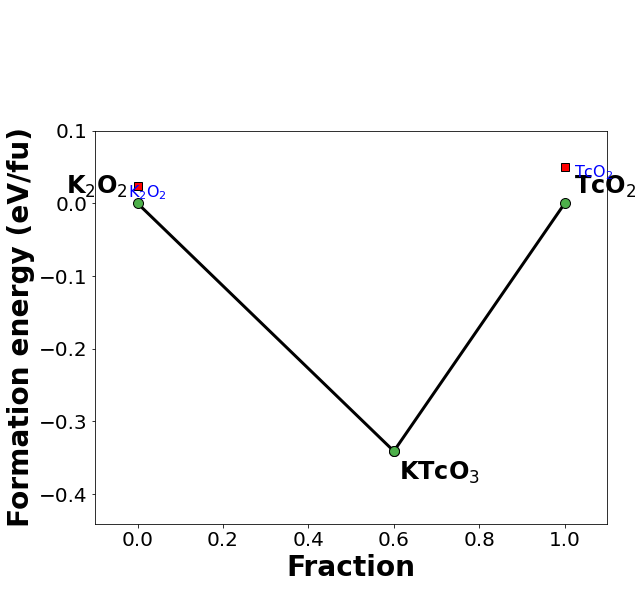

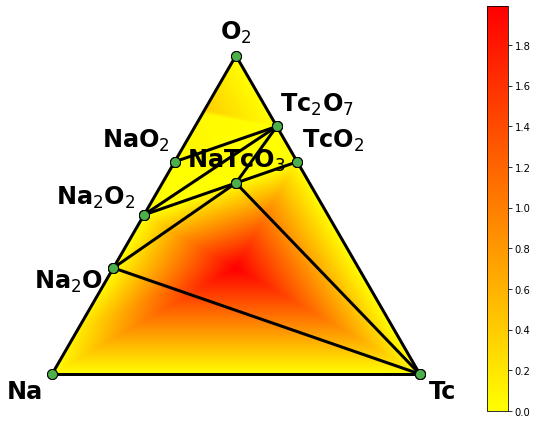

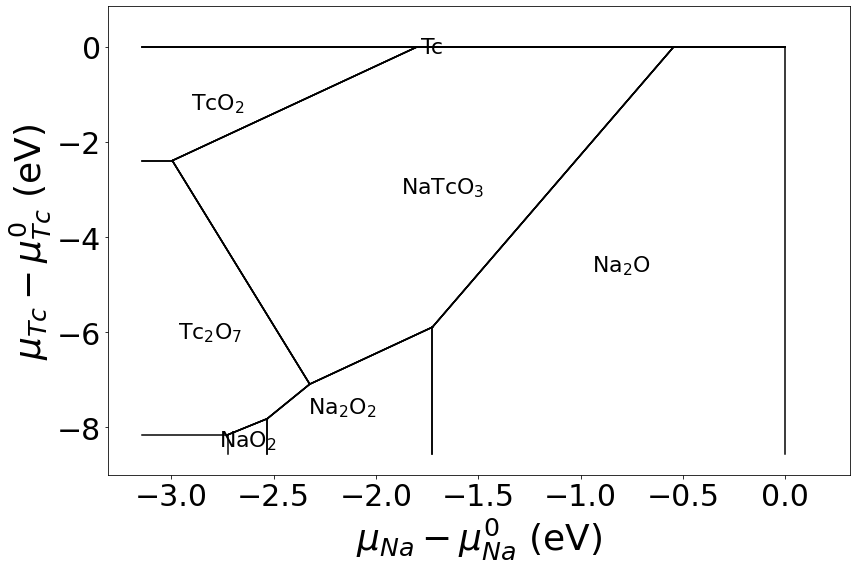

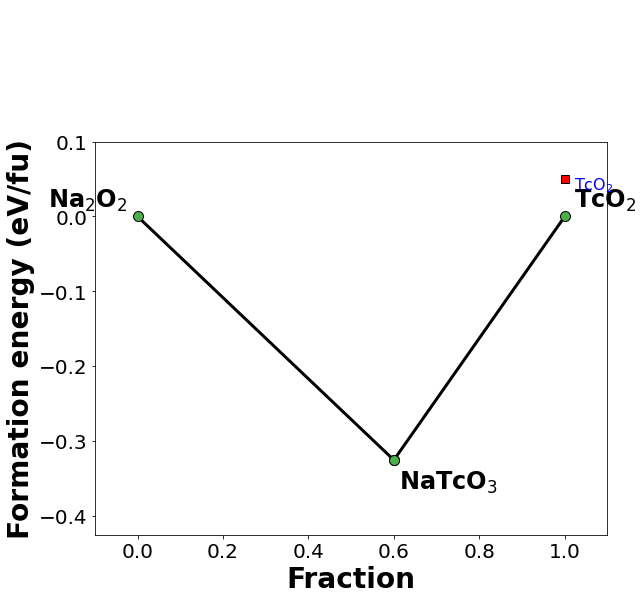

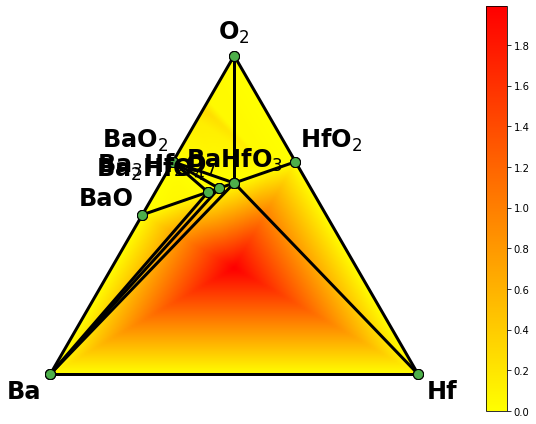

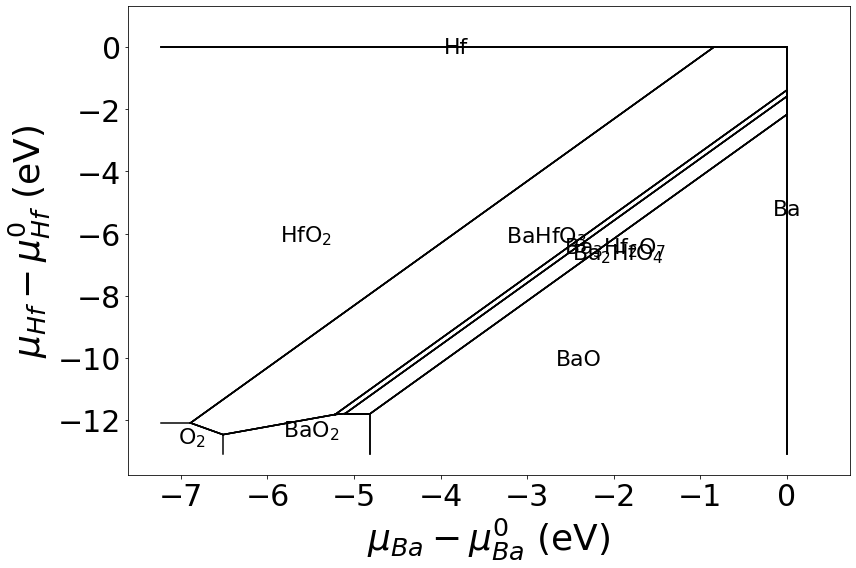

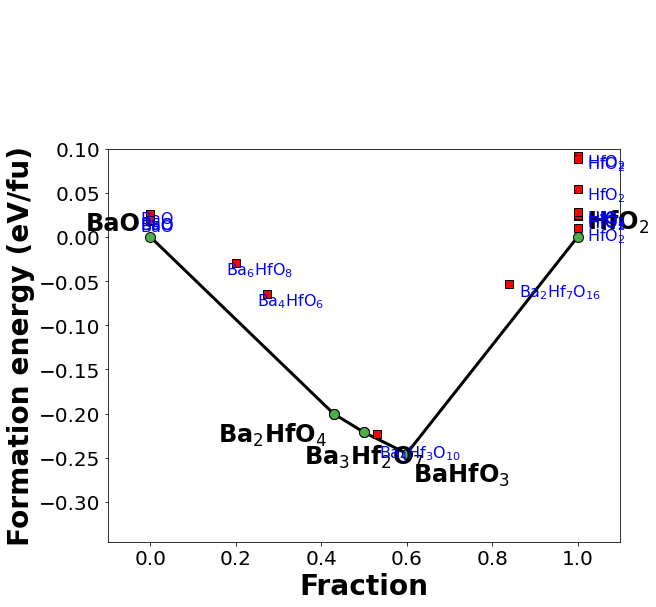

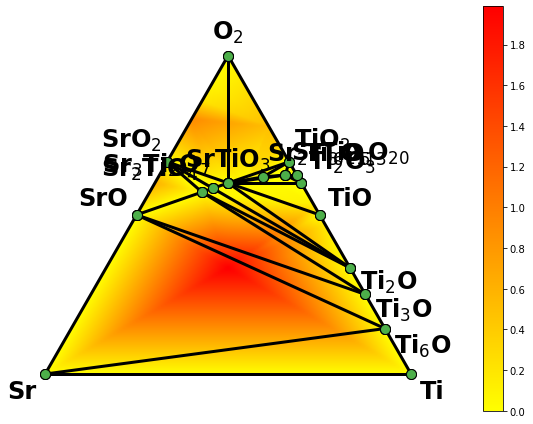

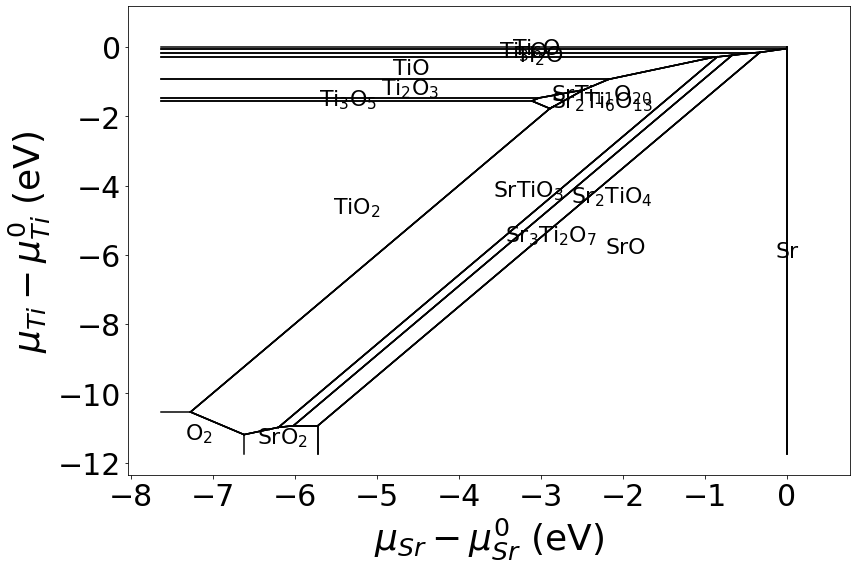

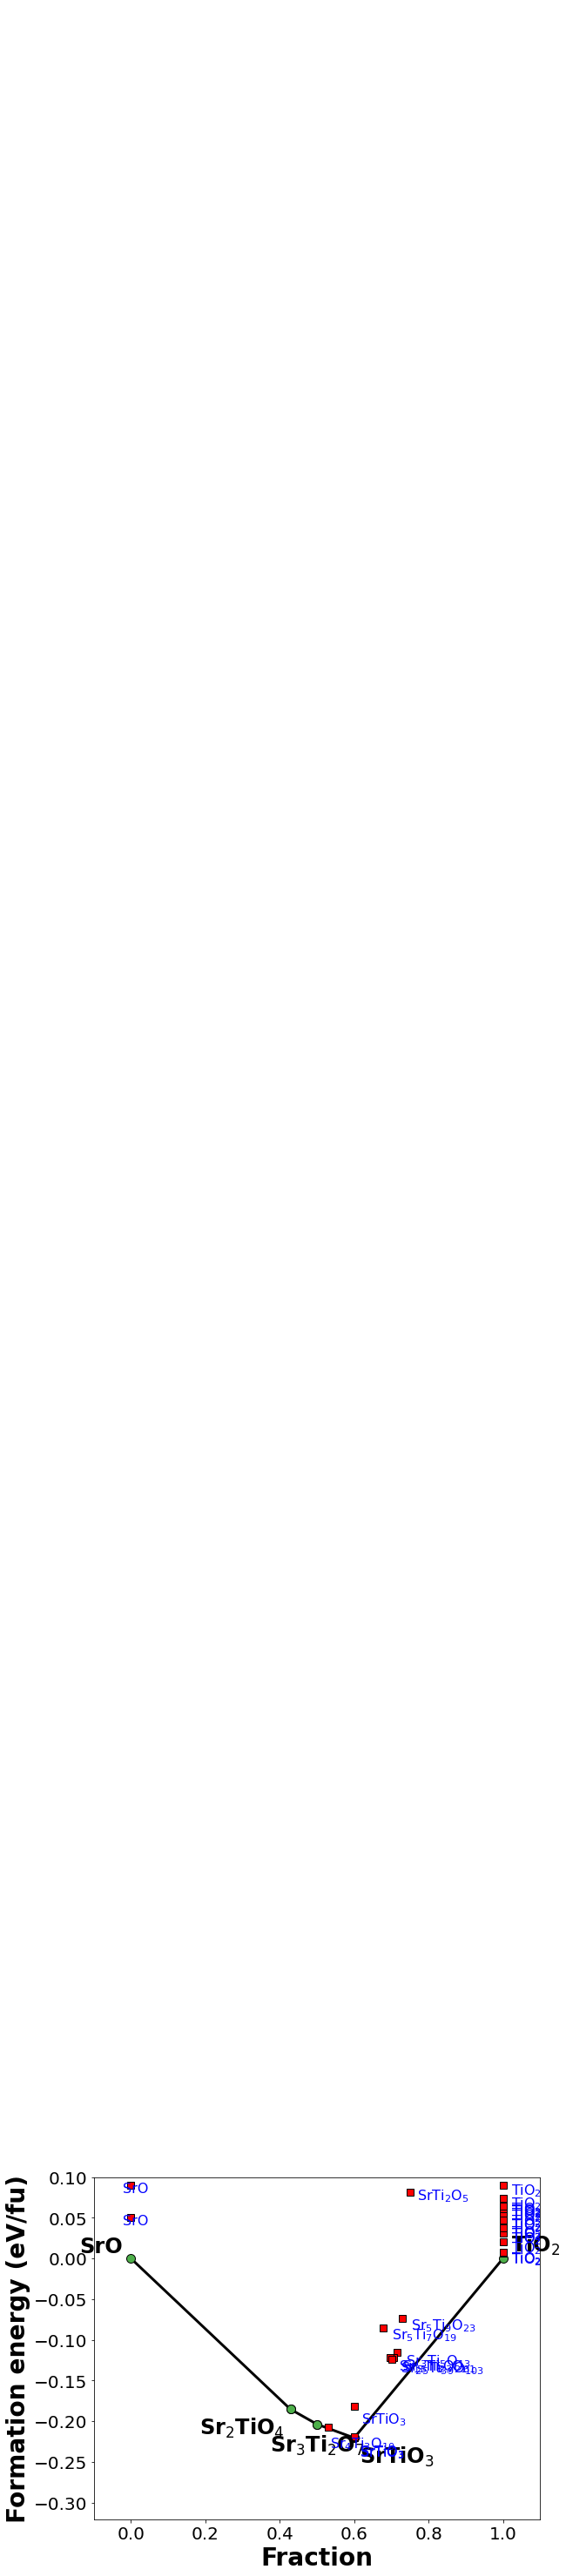

In [85]:
index_final = 11 #len(df_analysis + 1)
for index in range(1,index_final):
    entries = mpr.get_entries_in_chemsys([df_analysis.A_site[index],df_analysis.B_site[index],'O'])
    new_entries = entries + [computed_entry(index)]
    phase_diagram = PhaseDiagram(new_entries)
    plotter = PDPlotter(phase_diagram, show_unstable=False)
    plt = plotter.get_contour_pd_plot()
    plt.tight_layout()
    plt.savefig('../results_nurion/bulk_analysis/plots/phase_diagram/%03d_%s' % (index, df_analysis.formula[index]))
    
    plt2 = plotter.get_chempot_range_map_plot([Element(df_analysis.A_site[index]), Element(df_analysis.B_site[index])])
    plt2.tight_layout()
    plt2.savefig('../results_nurion/bulk_analysis/plots/chempot_map/%03d_%s' % (index, df_analysis.formula[index]))
    
    cpd = CompoundPhaseDiagram(entries, [Composition(df_analysis.A_site[index] + 'O'),Composition(df_analysis.B_site[index] +'O2')], normalize_terminal_compositions=True)
    compound_plotter = PDPlotter(cpd, show_unstable = 10)
    plt3 = compound_plotter.get_plot()
   # plt.tight_layout()
    plt3.savefig('../results_nurion/bulk_analysis/plots/cpd/%03d_%s' % (index, df_analysis.formula[index]))  
    
    

In [54]:
def get_ion_ref(chemsys):

    pbx_entries = []
    # Get ion entries first, because certain ions have reference
    # solids that aren't necessarily in the chemsys (Na2SO4)
    url = '/pourbaix_diagram/reference_data/' + '-'.join(chemsys)
    ion_data = mpr._make_request(url)
    ion_ref_comps = [Composition(d['Reference Solid']) for d in ion_data]
    ion_ref_elts = list(itertools.chain.from_iterable(i.elements for i in ion_ref_comps))
    ion_ref_entries = mpr.get_entries_in_chemsys(
            list(set([str(e) for e in ion_ref_elts] + ['O', 'H'])),
            property_data=['e_above_hull'], compatible_only=False)
    compat = MaterialsProjectAqueousCompatibility("Advanced")
    ion_ref_entries = compat.process_entries(ion_ref_entries)
    ion_ref_pd = PhaseDiagram(ion_ref_entries)

    # position the ion energies relative to most stable reference state
    for n, i_d in enumerate(ion_data):
        ion_entry = IonEntry(Ion.from_formula(i_d['Name']), i_d['Energy'])
        refs = [e for e in ion_ref_entries if e.composition.reduced_formula == i_d['Reference Solid']]
        if not refs:
            raise ValueError("Reference solid not contained in entry list")
        stable_ref = sorted(refs, key=lambda x: x.data['e_above_hull'])[0]
        rf = stable_ref.composition.get_reduced_composition_and_factor()[1]
        solid_diff = ion_ref_pd.get_form_energy(stable_ref) \
                                - i_d['Reference solid energy'] * rf
        elt = i_d['Major_Elements'][0]
        correction_factor = ion_entry.ion.composition[elt] \
                                                / stable_ref.composition[elt]
        ion_entry.energy += solid_diff * correction_factor
        pbx_entries.append(PourbaixEntry(ion_entry, 'ion-{}'.format(n)))

    return pbx_entries, ion_ref_entries, ion_ref_pd

In [55]:
def get_pourbaix_entry_solid(entry, ion_ref_pd):
    form_e = ion_ref_pd.get_form_energy(entry)
    new_entry = deepcopy(entry)
    new_entry.uncorrected_energy = form_e
    new_entry.correction = 0.0
    pbx_entry = PourbaixEntry(new_entry)
    return pbx_entry

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 1356.57it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

1   SrTcO3  0.817


100%|██████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 1378.83it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

2   BaFeO3  0.606


100%|██████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<00:00, 1458.97it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

3   BaMoO3  0.717


100%|██████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 1448.32it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

4   KTaO3  0.301


100%|██████████████████████████████████████████████████████████████████████████████| 146/146 [00:00<00:00, 1394.12it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

5   BaZrO3  0.511


100%|██████████████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 1439.55it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

6   SrFeO3  0.543


100%|████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 1438.61it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

7   KTcO3  0.488


100%|████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 1462.92it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

8   NaTcO3  0.407


100%|██████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 1461.90it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

9   BaHfO3  0.566


100%|██████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 1462.52it/s]
C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jky\Anaconda3\envs\tensorflow\lib\site-packages\pymatgen\analysis\pourbaix_diagram.py:1041: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

10   SrTiO3  0.361


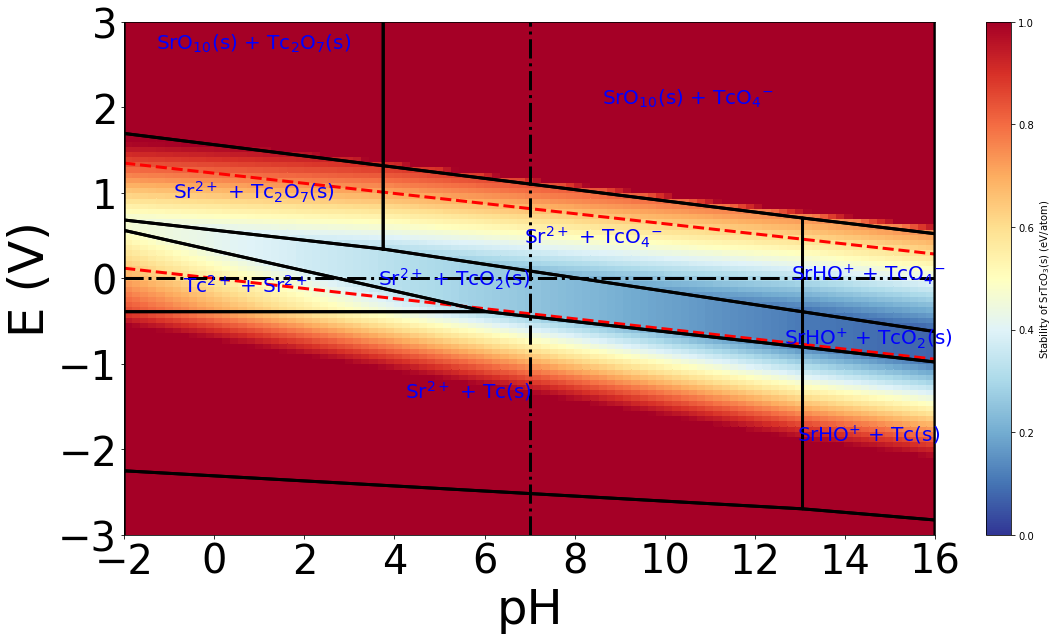

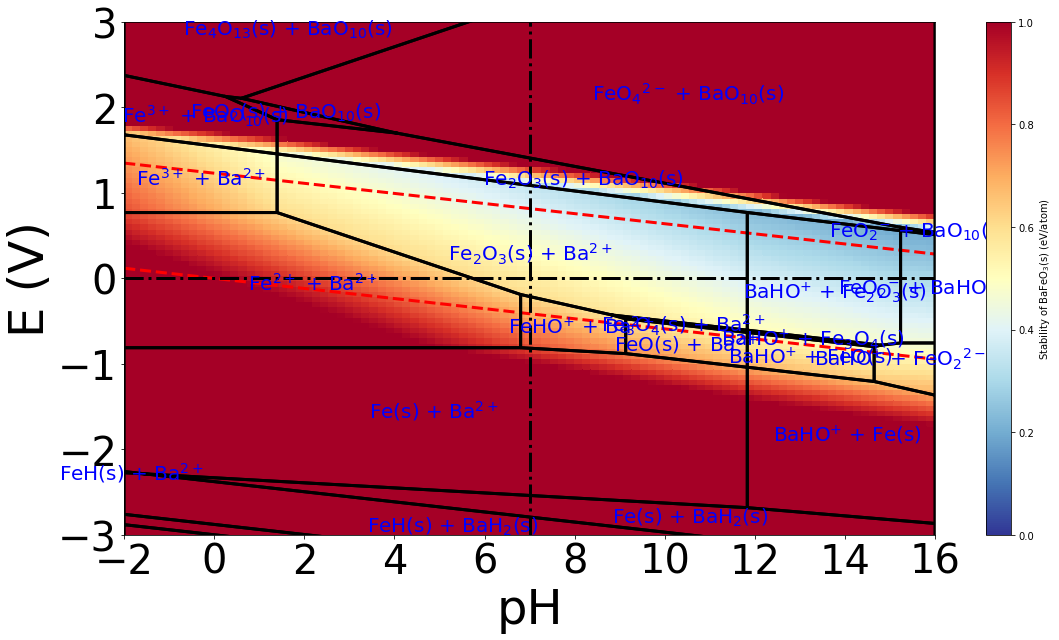

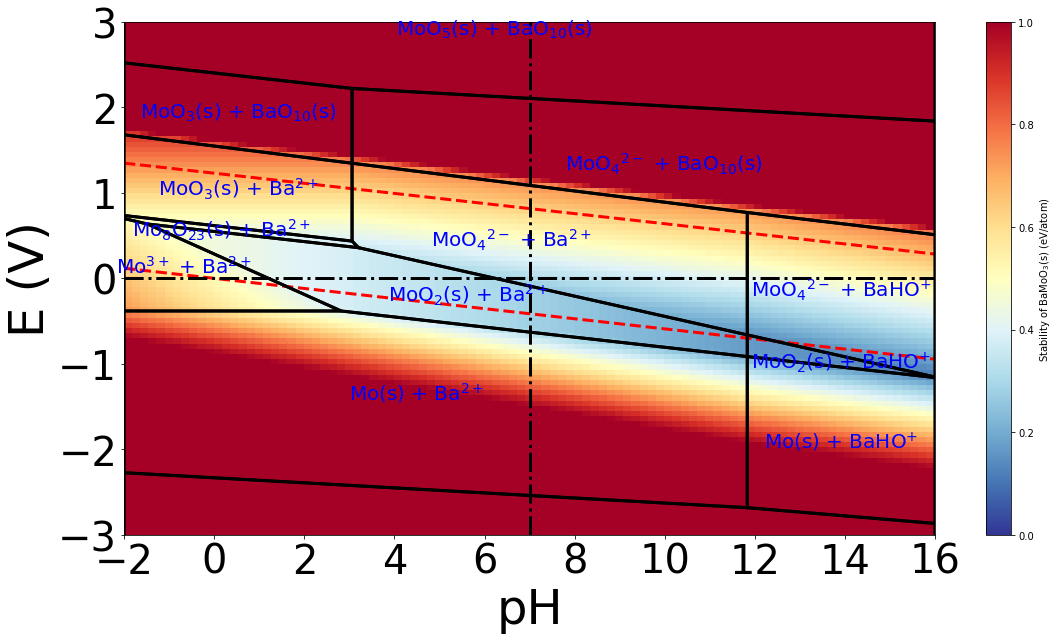

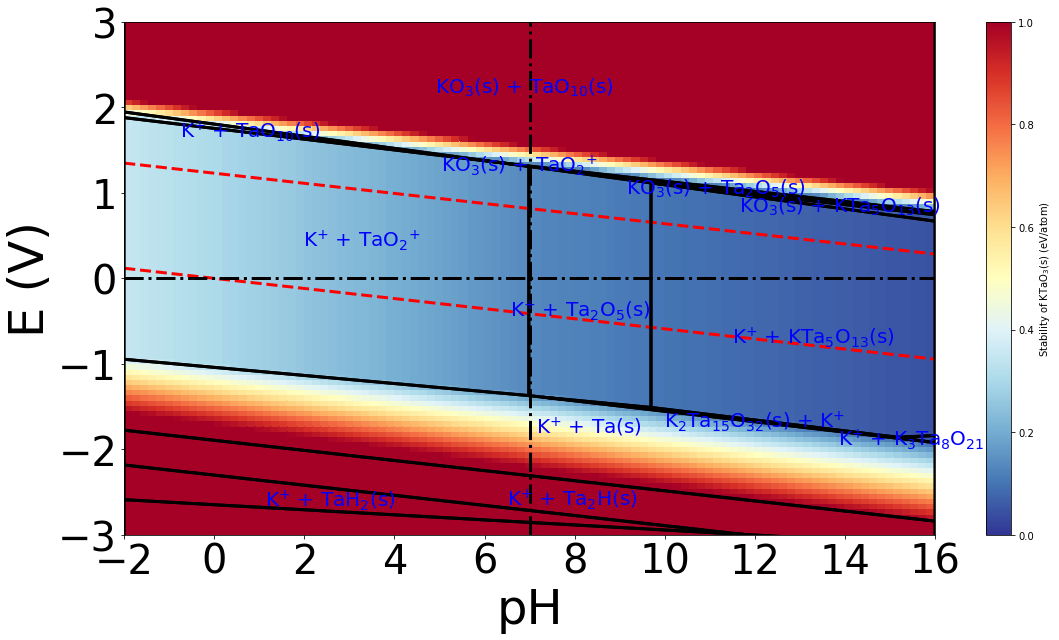

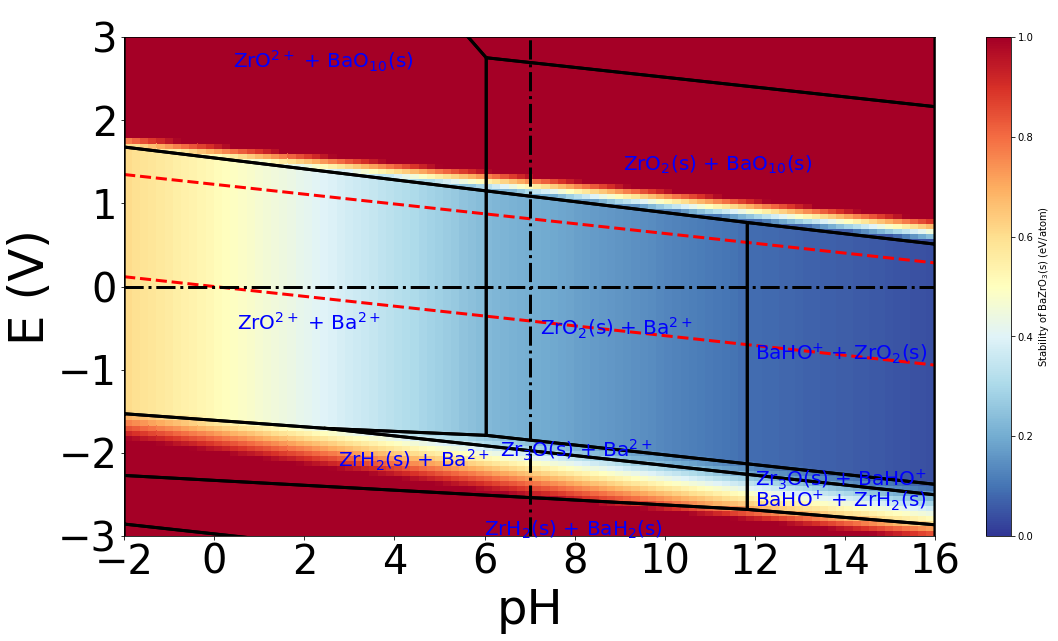

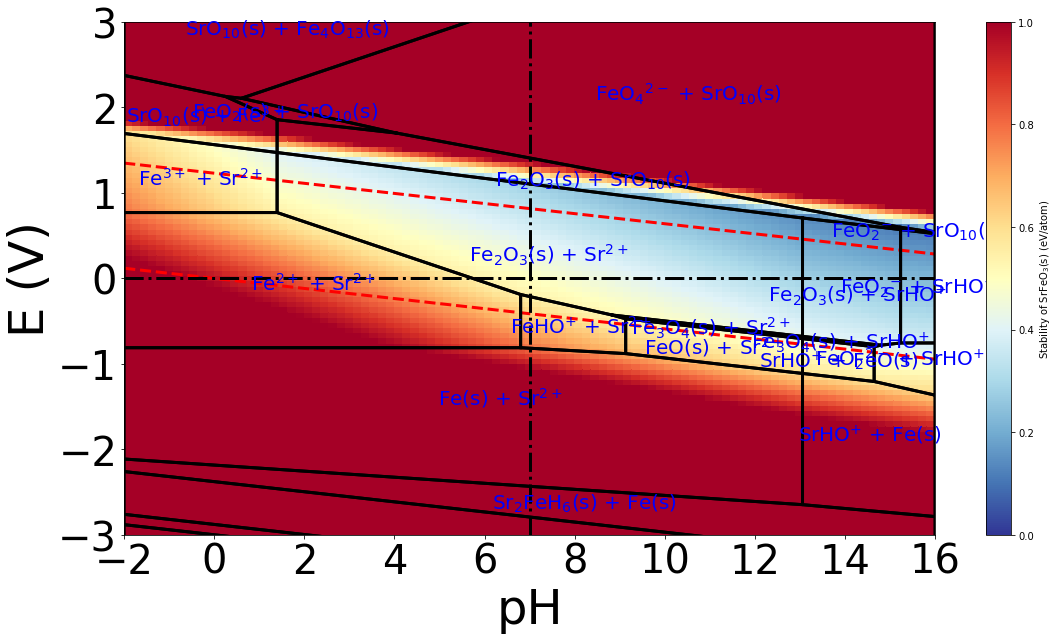

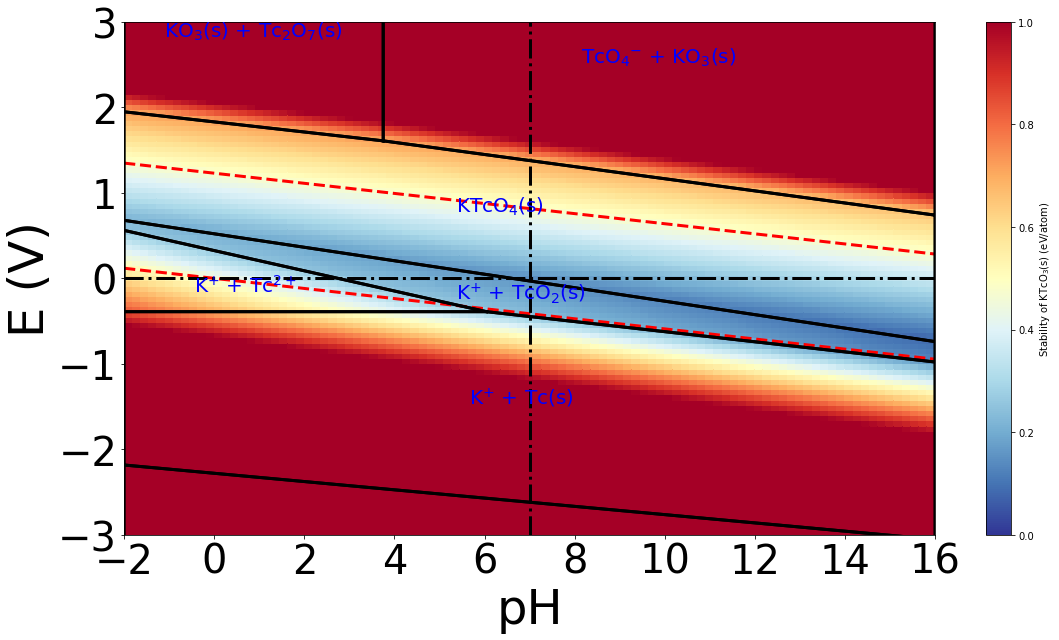

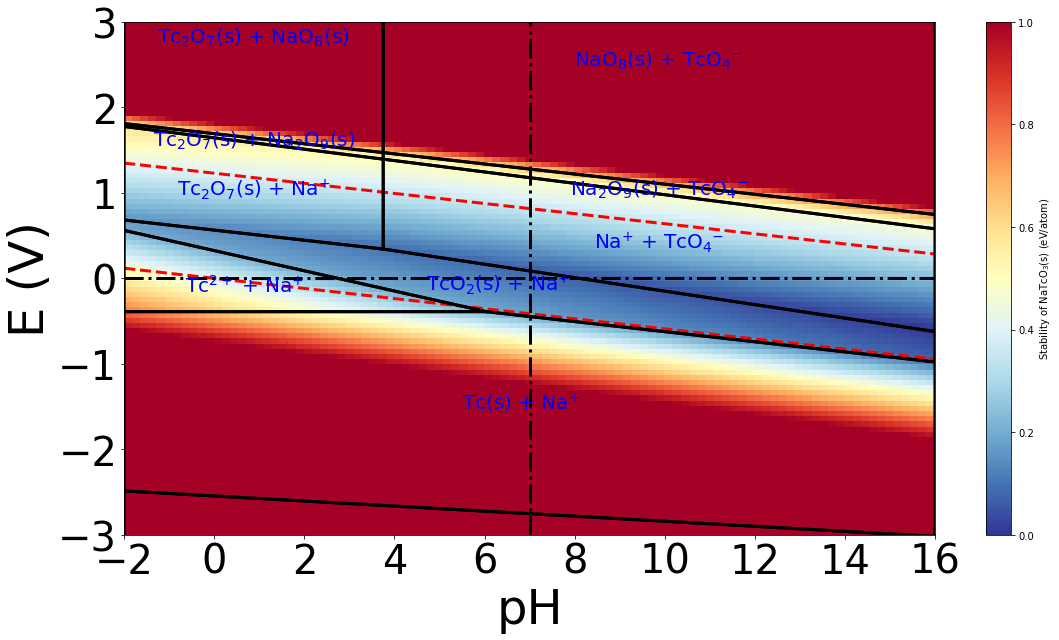

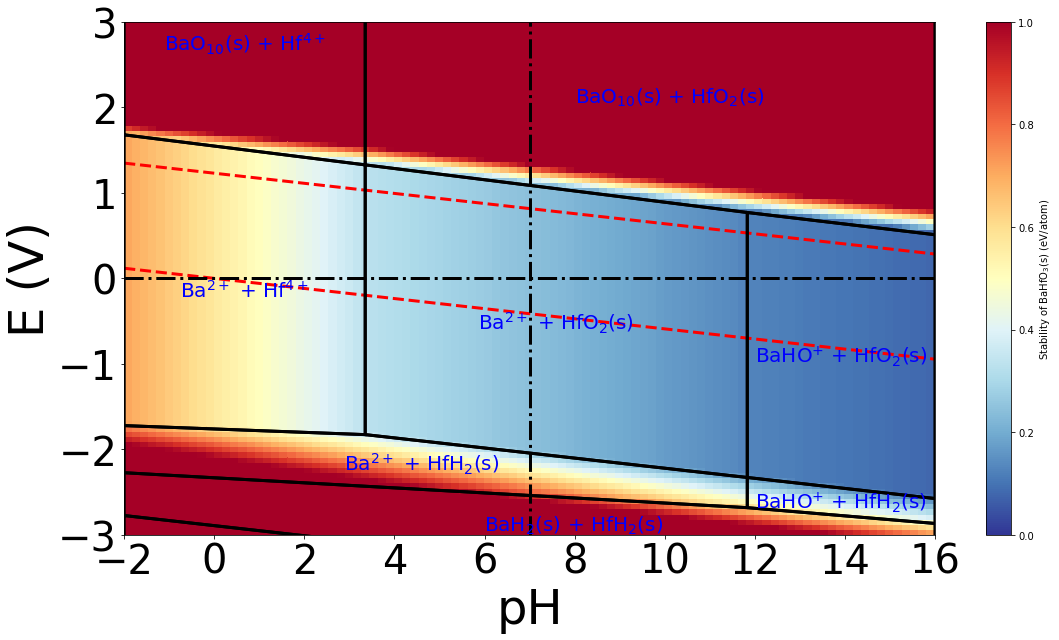

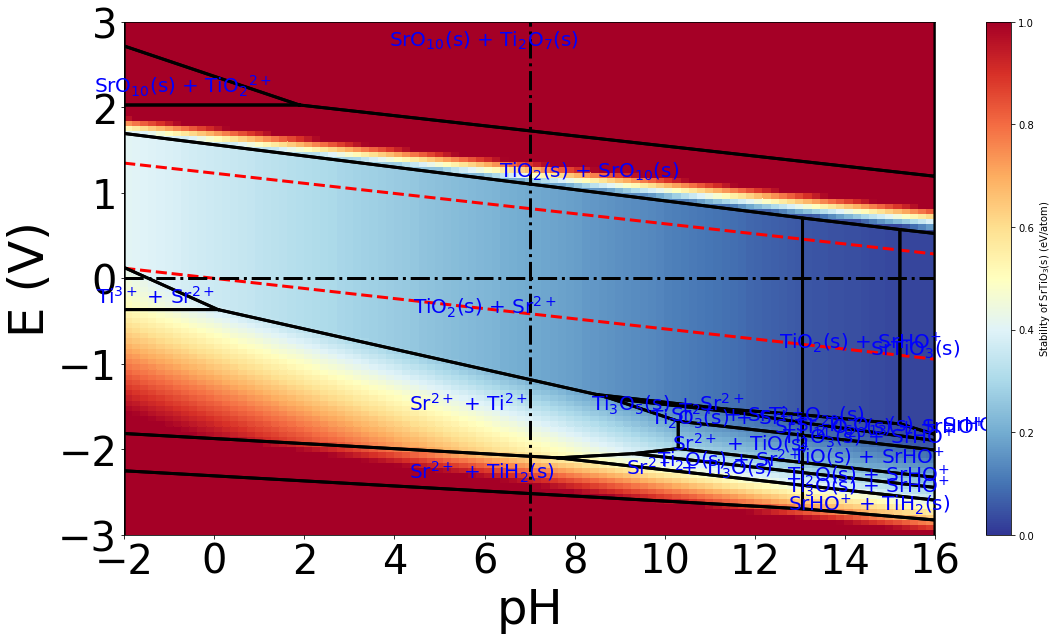

In [62]:
index_final = 11 #len(df_analysis + 1)
df_analysis['DG_pbx'] = None
for index in range(1,index_final):
    elements = [df_analysis.A_site[index], df_analysis.B_site[index]]
    compt_entry = computed_entry(index)
    pbx_entries, ion_ref_entries, ion_ref_pd = get_ion_ref(elements)
    new_pourbaix_entry = get_pourbaix_entry_solid(compt_entry, ion_ref_pd)
    
    pourbaix_entries = mpr.get_pourbaix_entries(elements)
    pourbaix_entries.append(new_pourbaix_entry)
    
    pbx = PourbaixDiagram(pourbaix_entries)
    DG_pbx = pbx.get_decomposition_energy(new_pourbaix_entry, 0, 1.23)
    df_analysis['DG_pbx'][index] = DG_pbx
    print(index," ",df_analysis.formula[index]," %4.3f" % DG_pbx)
    
    entry = [e for e in pourbaix_entries if e.entry_id == 'gyjung'][0]
    
    plotter = PourbaixPlotter(pbx)
    plt = plotter.plot_entry_stability(entry)
    plt.tight_layout()
    plt.savefig('../results_nurion/bulk_analysis/plots/pourbaix/%03d_%s' % (index, df_analysis.formula[index]))

In [63]:
df_analysis.head(10)

MP_ID formula A_site B_site  total_E        Ehull    Ehull_ref  \
1    mp-12631  SrTcO3     Sr     Tc -37.3222 -8.88178e-16            0   
2    mp-19035  BaFeO3     Ba     Fe -31.4303    0.0404226            0   
3    mp-19322  BaMoO3     Ba     Mo -35.0364 -1.77636e-15            0   
4     mp-3614   KTaO3      K     Ta -41.0688    0.0140585            0   
5     mp-3834  BaZrO3     Ba     Zr -41.7257            0            0   
6   mp-510624  SrFeO3     Sr     Fe -31.5665    0.0475081            0   
7   mp-973267   KTcO3      K     Tc  -34.457 -8.88178e-16            0   
8   mp-977176  NaTcO3     Na     Tc  -34.732 -8.88178e-16            0   
9   mp-998552  BaHfO3     Ba     Hf -43.5585   0.00667443            0   
10    mp-5229  SrTiO3     Sr     Ti -39.9939    0.0270269  0.000882218   

        DHf  DHf_ref  old_tolerance  new_tolerance  \
1  -2.53011  -2.4626       0.979602       3.724156   
2  -2.26297 -2.24803       1.069543       3.809486   
3  -2.61079 -2.59231       1.038240       3.615536   
4  -3.10677 -3.08679       1.053728       3.910715   
5  -3.72278 -3.64821       1.003958       3.501807   
6  -2.34447 -2.32825       1.009137       3.843562   
7  -2.07658 -1.99586       1.074802       4.051656   
8  -2.07844 -1.98714       0.986414       4.090845   
9  -3.80835 -3.79575       1.008716       3.511193   
10 -3.57315 -3.56062       0.999096       3.791758   

                                            structure    DG_pbx  
1   (Atom('Sr', [0.0, 0.0, 0.0], index=0), Atom('T...   0.81715  
2   (Atom('Ba', [2.0165225, 2.0165225, 2.0165225],...  0.605842  
3   (Atom('Ba', [2.068112131752645, 2.068112131752...  0.717172  
4   (Atom('K', [2.0142334299130127, 2.014233429913...  0.300897  
5   (Atom('Ba', [0.0, 0.0, 0.0], index=0), Atom('Z...  0.511423  
6   (Atom('Sr', [1.9519272754481227, 1.95192727544...  0.542531  
7   (Atom('K', [0.0, 0.0, 0.0], index=0), Atom('Tc...  0.487984  
8   (Atom('Na', [0.0, 0.0, 0.0], index=0), Atom('T...  0.407191  
9   (Atom('Ba', [2.100592663086139, 2.100592663086...  0.566174  
10  (Atom('Sr', [0.0, 0.0, 0.0], index=0), Atom('T...  0.361325